## Minder misdaad door minder welvaart

argumentatie met andere bronnen / redeneren

### Verband tussen welvaart en verschillende misdaden

Met name fraude gebeurt meer in rijkere landen. In rijkere landen loont fraude wellicht meer doordat transacties gaan over grotere bedragen, een rijkere bevolking loont de fraudeur meer.

In [8]:
import pandas as pd
import plotly.express as px
import numpy as np

# === Load Data ===

# Crime dataset
crime_df = pd.read_csv("europe_crime_definitive_per_100k.csv")

# World Bank economic dataset
econ_df = pd.read_csv("world_bank_definitive.csv")

# === Filter and Preprocess ===

# Desired economic indicators
selected_indicators = [
"GDP, PPP (constant 2021 international $)",
"Gross national expenditure (current US$)",
"Imports of goods and services (current US$)",
"Total reserves (includes gold, current US$)",
"GNI per capita growth (annual %)",
"Inflation, consumer prices (annual %)"
]

# Filter econ_df for selected indicators
econ_filtered = econ_df[econ_df["Indicator Name"].isin(selected_indicators)]

# Pivot so each indicator becomes a column
econ_pivot = econ_filtered.pivot_table(
index=["Country Name", "Year"],
columns="Indicator Name",
values="Value"
).reset_index()

# Prepare crime data
crime_df.rename(columns={
    'Geopolitical entity (reporting)': 'Country Name',
    'TIME_PERIOD': 'Year'
}, inplace=True)
crime_df['Year'] = pd.to_numeric(crime_df['Year'], errors='coerce')

# Rename columns for convenience
econ_pivot.columns.name = None

# Merge on Country and Year
merged_df = pd.merge(econ_pivot, crime_df, on=['Country Name', 'Year'])

# Drop rows with missing values
merged_df.dropna(inplace=True)

# Extract actual column names
econ_cols = selected_indicators
crime_cols = [col for col in crime_df.columns if col not in ['Country Name', 'Year'] and col in merged_df.columns]

# Subset relevant columns
corr_data = merged_df[econ_cols + crime_cols].select_dtypes(include=[np.number])

# Recalculate available econ and crime columns (since some might have been dropped)
econ_cols_numeric = [col for col in econ_cols if col in corr_data.columns]
crime_cols_numeric = [col for col in crime_cols if col in corr_data.columns]

# Compute correlation matrix
correlation_matrix = corr_data.corr()
econ_crime_corr = correlation_matrix.loc[econ_cols_numeric, crime_cols_numeric]

# === Plot Heatmap ===
fig = px.imshow(
econ_crime_corr,
labels=dict(x="Misdaad Indicators", y="Economische Indicators", color="Correlatie"),
x=econ_crime_corr.columns,
y=econ_crime_corr.index,
color_continuous_scale="RdBu",
zmin=-1, zmax=1,
)
fig.update_layout(title="Correlatie tussen Economische indicators en misdaad indicators")
fig.show()

> *Figuur 1: Een heatmap over de correlaties tussen economische indicators en misdaad indicators*

Verklaringen voor figuur 1, waarom past het bij het perspectief

Je kan zien dat misdaden die met geld, kidnappen en sexuele activiteiten te maken hebben meer gebeuren in rijkere landen WANT VARIABELE 1, 2 CORRELEREN MET... , terwijl corruptie en moord juist meer gebeurt in minder rijke landen. Vaak is ongelijkheid ook een vorm van corruptie, dus dit is logisch. 

### Argument 2

Uitleg andere bronnen, logica

In [9]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load and prepare the data
police_df = pd.read_csv("europe_justice_per_100k.csv")
crime_df = pd.read_csv("europe_crime_definitive_per_100k.csv")

police_df.rename(columns={"TIME_PERIOD": "Year"}, inplace=True)
crime_df.rename(columns={"TIME_PERIOD": "Year"}, inplace=True)

# Filter and merge
police_df = police_df[["geo", "Year", "Police officers"]]
crime_df = crime_df[["geo", "Year", "Theft"]]
merged_df = pd.merge(police_df, crime_df, on=["geo", "Year"])
merged_df.dropna(subset=["Police officers", "Theft"], inplace=True)

# Melt for dual-line plotting
melted = merged_df.melt(id_vars=["geo", "Year"],
                        value_vars=["Police officers", "Theft"],
                        var_name="Metric",
                        value_name="Value")

# Get unique countries
countries = sorted(melted["geo"].unique())

# Build the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([

    dcc.Dropdown(
        id='country-selector',
        options=[{'label': c, 'value': c} for c in countries],
        value=["AL"],  # Default selected
        multi=True,
        placeholder="Select one or more countries"
    ),

    dcc.Graph(id='line-chart')
])


@app.callback(
    Output('line-chart', 'figure'),
    [Input('country-selector', 'value')]
)
def update_chart(selected_countries):
    if not selected_countries:
        return px.line(title="No countries selected")

    filtered = melted[melted["geo"].isin(selected_countries)]

    # Build line plot with metric as line type, country as color
    fig = px.line(
        filtered,
        x="Year",
        y="Value",
        color="geo",
        line_dash="Metric",  # Different dash style for 'Police officers' vs 'Theft'
        markers=True,
        title="Police Officers and Theft Rate Over Time",
        labels={"geo": "Country", "Value": "Rate per 100k", "Year": "Year", "Metric": "Type"},
        height=600
    )

    fig.update_layout(yaxis=dict(autorange=True))
    return fig


if __name__ == '__main__':
    app.run(debug=True)


> *Figuur 2: Een Lijn Grafiek die de hoeveelheid Politieagenten en de hoeveelheid Diefstal laat zien per jaar, met een menu waar je de landen kan kiezen waar je de data van wil hebben*

Recap + De grafiek toont de ontwikkeling van het aantal politieagenten en het aantal geregistreerde diefstallen per land over meerdere jaren. Wat opvalt, is dat er niet altijd een directe of omgekeerde relatie is tussen meer politiepersoneel en minder criminaliteit. In sommige landen daalt het aantal diefstallen ondanks een afname van het politieapparaat, terwijl in andere landen een stijging van het aantal agenten samengaat met meer meldingen van diefstal. Dit suggereert dat andere factoren zoals sociale omstandigheden, wetgeving, meldingsbereidheid en economische situatie ook een grote rol spelen bij criminaliteitscijfers. De grafiek benadrukt dus dat het aantal politieagenten op zichzelf geen garantie is voor minder criminaliteit, maar slechts één van de vele beïnvloedende factoren.

### Argument 3

Placeholder tekst

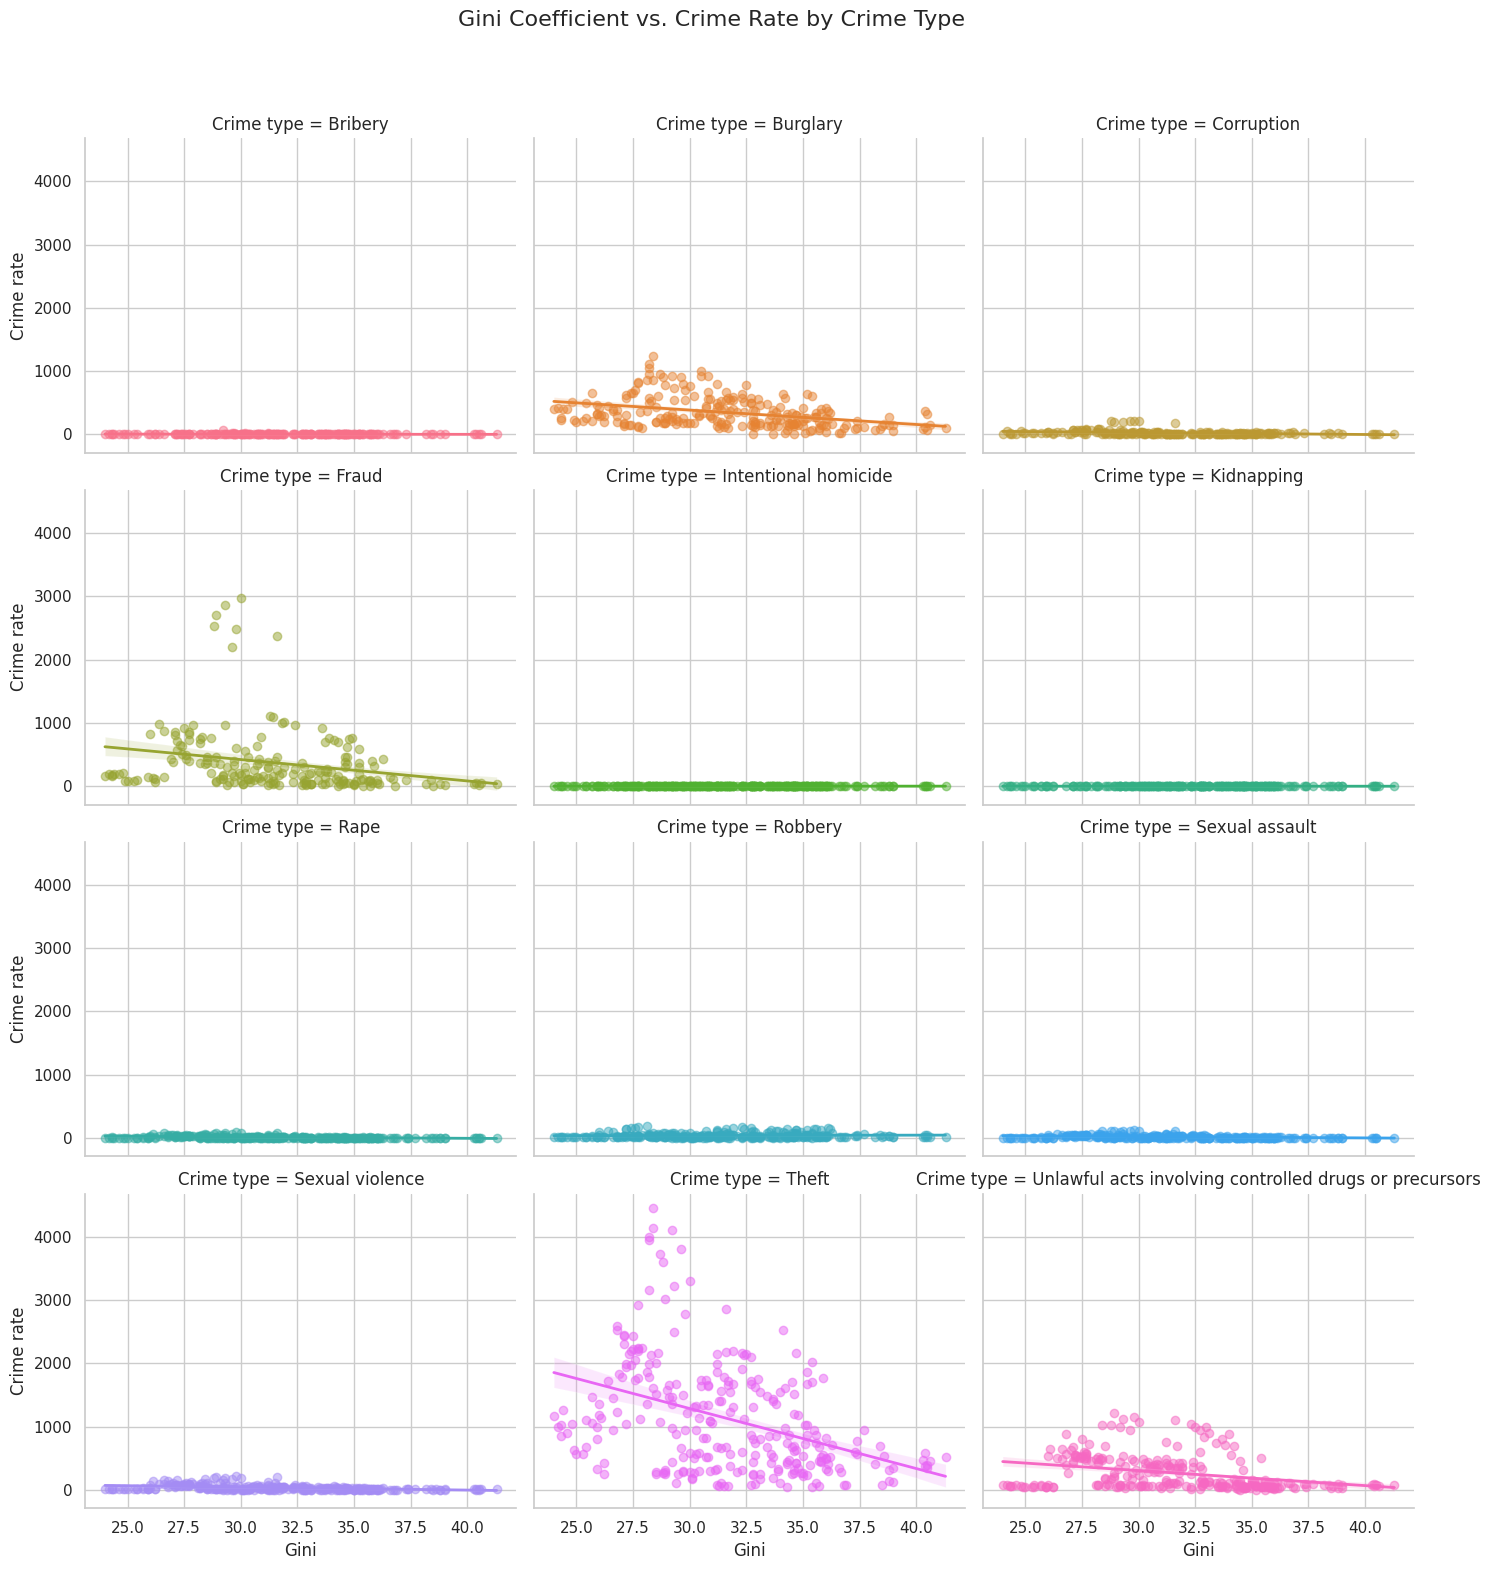

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the crime dataset (wide format)
crime_df = pd.read_csv("europe_crime_definitive_per_100k.csv")

# Load the Gini coefficient dataset
gini_df = pd.read_csv("gini_definitive.csv")

# Keep only relevant columns from Gini dataset and rename for clarity
gini_df = gini_df.rename(columns={
    "Country Name": "Country",
    "Value": "Gini"
})[["Country", "Year", "Gini"]]

# Reshape crime dataset from wide to long format
crime_long = crime_df.melt(
    id_vars=["Country Name", "geo", "Year"],
    var_name="Crime type",
    value_name="Crime rate"
)

# Rename to match Gini df for merging
crime_long = crime_long.rename(columns={"Country Name": "Country"})

# Merge on Country and Year
merged_df = pd.merge(crime_long, gini_df, on=["Country", "Year"], how="inner")

# Drop rows with missing data
merged_df = merged_df.dropna(subset=["Gini", "Crime rate"])

# Filter out non-numeric or clearly invalid values if necessary
merged_df = merged_df[pd.to_numeric(merged_df["Crime rate"], errors="coerce").notnull()]

# Plot: Regression with confidence intervals for each crime type
sns.set(style="whitegrid")
g = sns.lmplot(
    data=merged_df,
    x="Gini",
    y="Crime rate",
    hue="Crime type",
    col="Crime type",
    col_wrap=3,
    height=4,
    aspect=1.2,
    scatter_kws={"alpha": 0.5},
    line_kws={"linewidth": 2}
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Gini Coefficient vs. Crime Rate by Crime Type", fontsize=16)

plt.show()
